<a href="https://colab.research.google.com/github/varsharoshan/Rihal_DataScience_Challenge/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **the** **Dependencies** 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error



**DATA COLLECTION AND PROCESSING**

In [ ]:
pd.options.display.max_columns = 110
df_train = pd.read_csv('/data_train.csv')
display(df_train.head())
df_test = pd.read_csv('/data_test.csv')
display(df_test.head())


checking the number of rows and columns

In [ ]:
#checking the number of rows and columns
df_train.shape


In [ ]:
df_test.shape

Getting some information about dataset 


In [ ]:
df_train.info()

In [ ]:
df_test.info()

Checking the missing values

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

**Imputing the missing values**       

There are several ways of replacing missing values:
Replacing with mean:This is the most common method of imputing the missing values of numeric columns. We use 'fillna' method for imputing the column "engine_capacity" with the mean of respective column values.


In [ ]:
#replace the missing values for columns with mean in training set
df_train['engine_capacity'] = df_train['engine_capacity'].fillna(df_train['engine_capacity'].mean())


In [ ]:
df_train.isnull().sum()

In [ ]:
#replace the missing values for columns with mean in test set
df_test['engine_capacity'] = df_test['engine_capacity'].fillna(df_test['engine_capacity'].mean())

In [ ]:
df_test.isnull().sum()

checking the distribution of categorical data

In [ ]:
print(df_train.ownership.value_counts())
print(df_train.color.value_counts())
print(df_train.transmission.value_counts())
print(df_train.engine_fuel.value_counts())
print(df_train.engine_type.value_counts())
print(df_train.body_type.value_counts())
print(df_train.type_of_drive.value_counts())

In [ ]:
print(df_test.ownership.value_counts())
print(df_test.color.value_counts())
print(df_test.transmission.value_counts())
print(df_test.engine_fuel.value_counts())
print(df_test.engine_type.value_counts())
print(df_test.body_type.value_counts())
print(df_test.type_of_drive.value_counts())



**Encoding the Categorical Data**

Encoding categorical variables is an important step in the data science process,before we can use it to fit and evaluate a model.Here,Label encoding is used to replace the object datatype comprising strings into numerical values

Label encoding or Ordinal encoding method



In [ ]:
#Create object of ordinalencoding
cleanup_nums={"transmission":  {"manual":0,"automatic":1},
              "color":         {"black":0,"silver":1,"blue":2,"white":3,"grey":4,
                                "red":5,"green":6,"other":7,"brown":8,"violet":9,
                                "yellow":10,"orange":11},
              "engine_fuel":   {"gasoline":0,"diesel":1,"gas":2,"hybrid-petrol":3,
                                "electric":4,"hybrid-diesel":5},
              "engine_type":   {"gasoline":0,"diesel":1,"electric":2},
              "body_type":     {"sedan":0,"hatchback":1,"universal":2,"suv":3,
                                "minivan":4,"minibus":5,"van":6,"coupe":7,"liftback":8,
                                "pickup":9,"cabriolet":10,"limousine":11},
              "ownership":     {"owned":0,"new":1,"emergency":2},
              "type_of_drive": {"front":0,"rear":1,"all":2},
             
}

In [ ]:
#replace the values of categorical data in training set with numerical values
df_train = df_train.replace(cleanup_nums)
df_train.head()

In [ ]:
#check whether the datatype of categorical variables changed
df_train.info()

In [ ]:
##replace the values of categorical data in test set with numerical values
df_test = df_test.replace(cleanup_nums)
df_test.head()

In [ ]:
# we only use other features except, "manufacturer name and "price_usd", hence drop these columns.
# We use axis=1, to drop a column, and,axis=0, to drop a row
#Splitting Training data into input(x) and output(y)
df_train_x = df_train.drop(["manufacturer_name","price_usd"],axis=1)
df_train_y = df_train["price_usd"]

In [ ]:
print(df_train_x)

In [ ]:
print(df_train_y)

In [ ]:
#Splitting Test data into input(x) and output(y)
df_test_x = df_test.drop(["manufacturer_name","price_usd"],axis=1)
df_test_y = df_test["price_usd"]

**MODEL** **TRAINING**

  1.**Linear Regression**

In [ ]:
# loading linear regression model
lin_reg_model = LinearRegression()


In [ ]:
#using the training dataset only
lin_reg_model.fit(df_train_x,df_train_y)

LinearRegression()

Model Evaluation using Training Data

In [ ]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(df_train_x)
print(training_data_prediction)

[13513.25077613  8568.27282868 10707.94734136 ...  3997.72966021
  5478.66527724  5235.73419224]


In [ ]:
#Mean Squared Error
MSE = mean_squared_error(df_train_y,training_data_prediction)
print("Mean squared error:", MSE)

Mean squared error: 13390943.473078968


In [ ]:
#R squared Error
error_score = metrics.r2_score(df_train_y,training_data_prediction)
print("R squared error:", error_score)

R squared error: 0.6798148737588101


Visualize the actual prices and predicted prices

<function matplotlib.pyplot.show>

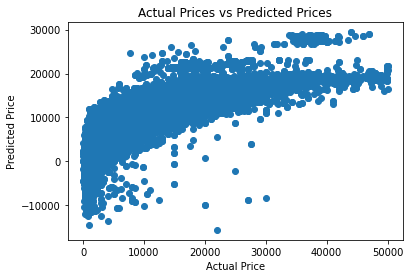

In [ ]:
plt.scatter(df_train_y,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

Model Evaluation using Test Data

In [ ]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(df_test_x)

In [ ]:
#Mean Squared Error
MSE = mean_squared_error(df_test_y,test_data_prediction)
print("Mean squared error:", MSE)

Mean squared error: 12685381.244072182


In [ ]:
#R squared Error
error_score = metrics.r2_score(df_test_y,test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.6861663929614372


In [ ]:
plt.scatter(df_test_y,test_data_prediction)
plt.xlabel("Actual Price",color='red')
plt.ylabel("Predicted Price",color='blue')
plt.title("Actual Prices vs Predicted Prices")
plt.show

NameError: ignored

**2.Random Forest Regressor**

In [ ]:
# Training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df_train_x,df_train_y)

RandomForestRegressor()

In [ ]:
#Prediction
Y_pred = model.predict(df_test_x)

#R squared error
from sklearn.metrics import r2_score
r2score = r2_score(df_test_y,Y_pred)
print("R2score",r2score*100)

R2score 94.95889603053462


In [ ]:
# Mean Squared Error
MSE = mean_squared_error(df_test_y,Y_pred)
print("Mean squared error:", MSE)

Mean squared error: 2037650.6629456142
